DATA 220 Lab2 (Python)

TEAM MEMEBERS:

Ashmit Kailash Pareek -01740129

Srushti Lalit Doshi - 0167132033

In [67]:
#Part1

Q1: Recommender System

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Step 2: Loading the movies and ratings data
movies = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
ratings = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [5]:
print("\nMovies DataFrame:")
print(movies.head())


Movies DataFrame:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [6]:
print("\nRatings DataFrame:")
print(ratings.head())


Ratings DataFrame:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [7]:
# Step 5: Creating m x u matrix with movies as row and users as column and normalising the matrix.
movie_matrix = ratings.pivot_table(index='MovieID', columns='UserID', values='Rating').fillna(0)
normalized_matrix = movie_matrix.sub(movie_matrix.mean(axis=1), axis=0)
# Displaying the matrix
print("Step 5:\nNormalized Movie Matrix:")
print(normalized_matrix.head())

Step 5:
Normalized Movie Matrix:
UserID       1         2         3         4         5         6         7     \
MovieID                                                                         
1        3.574007 -1.425993 -1.425993 -1.425993 -1.425993  2.574007 -1.425993   
2       -0.371523 -0.371523 -0.371523 -0.371523 -0.371523 -0.371523 -0.371523   
3       -0.238742 -0.238742 -0.238742 -0.238742 -0.238742 -0.238742 -0.238742   
4       -0.076821 -0.076821 -0.076821 -0.076821 -0.076821 -0.076821 -0.076821   
5       -0.147351 -0.147351 -0.147351 -0.147351 -0.147351 -0.147351 -0.147351   

UserID       8         9         10    ...      6031      6032      6033  \
MovieID                                ...                                 
1        2.574007  3.574007  3.574007  ... -1.425993  2.574007 -1.425993   
2       -0.371523 -0.371523  4.628477  ... -0.371523 -0.371523 -0.371523   
3       -0.238742 -0.238742 -0.238742  ... -0.238742 -0.238742 -0.238742   
4        2.923179 -

In [8]:
# Step 6: Performing the SVD to get U, S, and V.
svd = TruncatedSVD(n_components=50)
U = svd.fit_transform(normalized_matrix)
S = np.diag(svd.singular_values_)
VT = svd.components_

# Displaying the SVD components
print("\nU matrix:")
print(pd.DataFrame(U, index=movie_matrix.index).head())

print("\nS matrix:")
print(pd.DataFrame(S).head())

print("\nVT matrix:")
print(pd.DataFrame(VT, columns=normalized_matrix.columns).head())



U matrix:
                0          1          2          3          4          5   \
MovieID                                                                     
1        74.319654 -14.062042 -16.451234 -21.043417  26.327527  25.032277   
2        34.981460 -19.995515   4.952614 -14.654559   2.296245 -11.747388   
3        18.740902 -11.211365  -7.845887 -13.987859  -2.462078  -3.742103   
4         8.674404  -1.987153  -7.514598  -6.060233  -2.013530  -3.277424   
5        15.181071  -9.052305  -7.876799 -14.076517  -3.238557  -2.775622   

                6          7         8          9   ...         40        41  \
MovieID                                             ...                        
1        34.779609  22.946596  2.982184 -18.915051  ... -13.437246 -3.410579   
2         6.656969   2.278737  5.766323  -7.753616  ...   6.105111  7.894977   
3        -2.855200   4.576874 -1.292963  -1.111897  ...  -0.144261 -4.150735   
4        -0.958663  -3.385854  0.422716  -0.95852

In [9]:
# Step 7: Selecting top 50 components from S.
top_50_components = S[:50, :]

# Displaying the top 50 components
print("Step 7:\nTop 50 Components from S:{top_50_components.shape}")
print(pd.DataFrame(top_50_components))

Step 7:
Top 50 Components from S:{top_50_components.shape}
             0           1           2           3           4          5   \
0   1298.737154    0.000000    0.000000    0.000000    0.000000    0.00000   
1      0.000000  671.343541    0.000000    0.000000    0.000000    0.00000   
2      0.000000    0.000000  574.547984    0.000000    0.000000    0.00000   
3      0.000000    0.000000    0.000000  489.117526    0.000000    0.00000   
4      0.000000    0.000000    0.000000    0.000000  431.210029    0.00000   
5      0.000000    0.000000    0.000000    0.000000    0.000000  402.35363   
6      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
7      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
8      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
9      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
10     0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
11   

In [10]:
# Step 8: Getting the top 50 eigenvectors using eigenvalues.
covariance_matrix = np.cov(normalized_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Selecting the top 50 eigenvectors
top_50_eigenvectors = eigenvectors[:, :50]

# Displaying the top 50 eigenvectors
print("Step 8:\nTop 50 Eigenvectors:")
print(pd.DataFrame(top_50_eigenvectors).head())

Step 8:
Top 50 Eigenvectors:
                   0                   1                   2   \
0  0.006897+0.000000j  0.001372+0.000000j -0.001906+0.000000j   
1 -0.000587+0.000000j -0.002482+0.000000j -0.000117+0.000000j   
2  0.005645+0.000000j -0.003362+0.000000j  0.003951+0.000000j   
3  0.009474+0.000000j -0.001532+0.000000j  0.008692+0.000000j   
4  0.002641+0.000000j  0.003371+0.000000j -0.021302+0.000000j   

                   3                   4                   5   \
0 -0.013470+0.000000j  0.001777+0.000000j  0.009884+0.000000j   
1  0.002401+0.000000j -0.028983+0.000000j  0.008249+0.000000j   
2 -0.006602+0.000000j  0.001148+0.000000j -0.009678+0.000000j   
3  0.001537+0.000000j -0.004023+0.000000j -0.004238+0.000000j   
4  0.020793+0.000000j  0.012800+0.000000j  0.007956+0.000000j   

                   6                   7                   8   \
0 -0.001689+0.000000j  0.001074+0.000000j -0.024009+0.000000j   
1 -0.009970+0.000000j -0.003342+0.000000j  0.001207+0.00000

In [11]:
#Alternate Method
# Step 8. Get the top 50 eigenvectors using eigenvalues.
eigenvalues, eigenvectors = np.linalg.eigh(top_50_components)
print("Step 8:\nTop 50 Eigenvectors:")
print(pd.DataFrame(eigenvectors, columns=[f'EigenVector_{i}' for i in range(0, 50)]))

Step 8:
Top 50 Eigenvectors:
    EigenVector_0  EigenVector_1  EigenVector_2  EigenVector_3  EigenVector_4  \
0             0.0            0.0            0.0            0.0            0.0   
1             0.0            0.0            0.0            0.0            0.0   
2             0.0            0.0            0.0            0.0            0.0   
3             0.0            0.0            0.0            0.0            0.0   
4             0.0            0.0            0.0            0.0            0.0   
5             0.0            0.0            0.0            0.0            0.0   
6             0.0            0.0            0.0            0.0            0.0   
7             0.0            0.0            0.0            0.0            0.0   
8             0.0            0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0            0.0   
10            0.0            0.0            0.0            0.0            0.0   

In [66]:
# Step 9: Using cosine similarity, find 10 closest movies using the 50 components from SVD.
cosine_sim = cosine_similarity(U[:, :50])

# Choosing a movie ID for to find the closest movies
movie_id = 2

# Getting the movie indices and cosine similarities
movie_indices = list(movie_matrix.index)  # Assuming movie_user_matrix is your movie-user matrix
cosine_similarities = cosine_sim[movie_indices.index(movie_id)]

# Creating a DataFrame to store Movie IDs and their cosine similarities
similar_movies = pd.DataFrame({'MovieID': movie_indices, 'Cosine Similarity': cosine_similarities})

# Sorting the DataFrame in descending order of cosine similarity to get the top 10 closest movies
closest_movies = similar_movies.sort_values(by='Cosine Similarity', ascending=False).head(11)[1:]

# Displaying the top 10 closest movies
print(f"Step 9:\nTop 10 closest movies to Movie {movie_id} based on cosine similarity:")
print(closest_movies)

Step 9:
Top 10 closest movies to Movie 2 based on cosine similarity:
      MovieID  Cosine Similarity
3256     3489           0.957267
58         60           0.926206
632       653           0.890856
308       317           0.881829
1981     2162           0.880824
651       673           0.860648
1980     2161           0.857321
1561     1702           0.852328
1740     1920           0.849623
1873     2054           0.849050


In [68]:
#Part2

Q2: House Prices Prediction

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [14]:
file_path = "C:/Users/ashmi/OneDrive/Desktop/LAB 2/HousePrice.csv"
df = pd.read_csv(file_path)

In [15]:
# Displaying the first few rows of the dataset to explore its structure
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
          date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  5/2/14 0:00         3       1.50         1340      7912     1.5   
1  5/2/14 0:00         5       2.50         3650      9050     2.0   
2  5/2/14 0:00         3       2.00         1930     11947     1.0   
3  5/2/14 0:00         3       2.25         2000      8030     1.0   
4  5/2/14 0:00         4       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated  SalesPrice  
0          2005    313000.0  
1             0   2384000.0  
2             0    342000.0  
3

In [16]:
# Displaying information about the dataset, including data types and missing values
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  SalesPrice     4600 non-null   float64
dtypes: float64(3), int64(10), object(1)
memory usage: 503.3+ KB
None


In [17]:
# Displaying basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
          bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  4600.000000  4600.000000   4600.000000  4.600000e+03  4600.000000   
mean      3.400870     2.160815   2139.346957  1.485252e+04     1.512065   
std       0.908848     0.783781    963.206916  3.588444e+04     0.538288   
min       0.000000     0.000000    370.000000  6.380000e+02     1.000000   
25%       3.000000     1.750000   1460.000000  5.000750e+03     1.000000   
50%       3.000000     2.250000   1980.000000  7.683000e+03     1.500000   
75%       4.000000     2.500000   2620.000000  1.100125e+04     2.000000   
max       9.000000     8.000000  13540.000000  1.074218e+06     3.500000   

        waterfront         view    condition   sqft_above  sqft_basement  \
count  4600.000000  4600.000000  4600.000000  4600.000000    4600.000000   
mean      0.007174     0.240652     3.451739  1827.265435     312.081522   
std       0.084404     0.778405     0.677230   

In [18]:
# Step 2: Identifying features and target variable
features = df.drop('SalesPrice', axis=1)
target = df['SalesPrice']

print("Step 2: Features and Target Variable")
print("Features:")
print(features.columns.tolist())
print("Target Variable: SalesPrice")
print("\n")

Step 2: Features and Target Variable
Features:
['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Target Variable: SalesPrice




In [19]:
# Step 3: Checking the number of samples and missing values
num_samples = len(df)
missing_values = df.isnull().sum()

print("Step 3: Number of Samples and Missing Values")
print(f"Number of Samples: {num_samples}")

if missing_values.sum() == 0:
    print("Missing Values: 0")
else:
    print("Missing Values:")
    print(missing_values[missing_values > 0])  # Display columns with missing values

print("\n")

Step 3: Number of Samples and Missing Values
Number of Samples: 4600
Missing Values: 0




In [20]:
# Step 4: Summarizing the dataset
summary_stats = df.describe()

print("Step 4: Summary Statistics for Continuous Features")
print(summary_stats)
print("\n")

Step 4: Summary Statistics for Continuous Features
          bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  4600.000000  4600.000000   4600.000000  4.600000e+03  4600.000000   
mean      3.400870     2.160815   2139.346957  1.485252e+04     1.512065   
std       0.908848     0.783781    963.206916  3.588444e+04     0.538288   
min       0.000000     0.000000    370.000000  6.380000e+02     1.000000   
25%       3.000000     1.750000   1460.000000  5.000750e+03     1.000000   
50%       3.000000     2.250000   1980.000000  7.683000e+03     1.500000   
75%       4.000000     2.500000   2620.000000  1.100125e+04     2.000000   
max       9.000000     8.000000  13540.000000  1.074218e+06     3.500000   

        waterfront         view    condition   sqft_above  sqft_basement  \
count  4600.000000  4600.000000  4600.000000  4600.000000    4600.000000   
mean      0.007174     0.240652     3.451739  1827.265435     312.081522   
std       0.084404     0.778405     

Step 5: Visualization of Feature Distributions


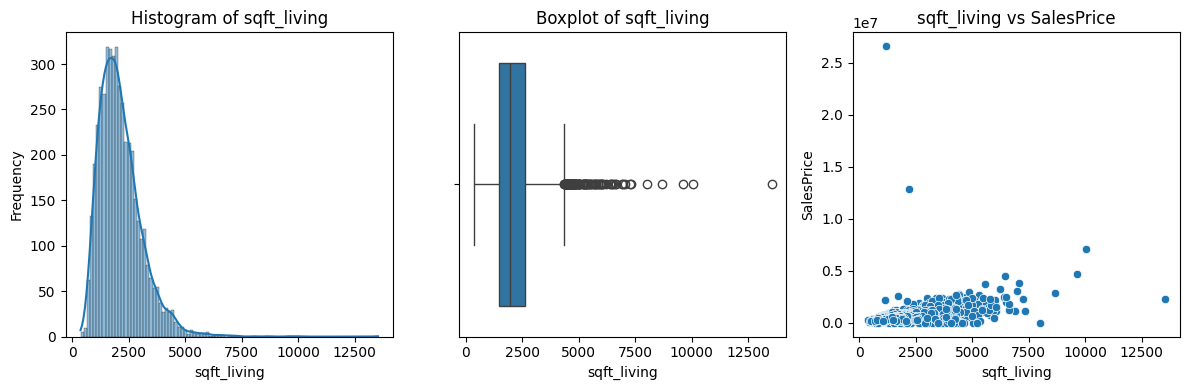

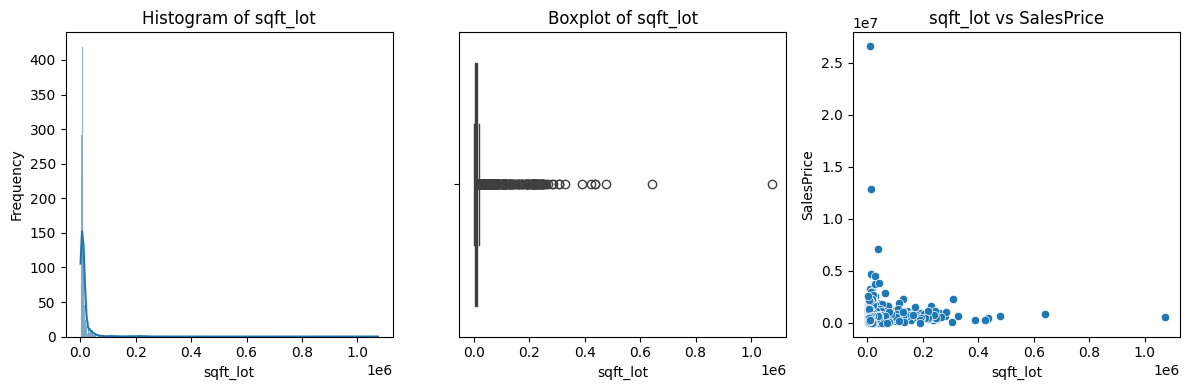

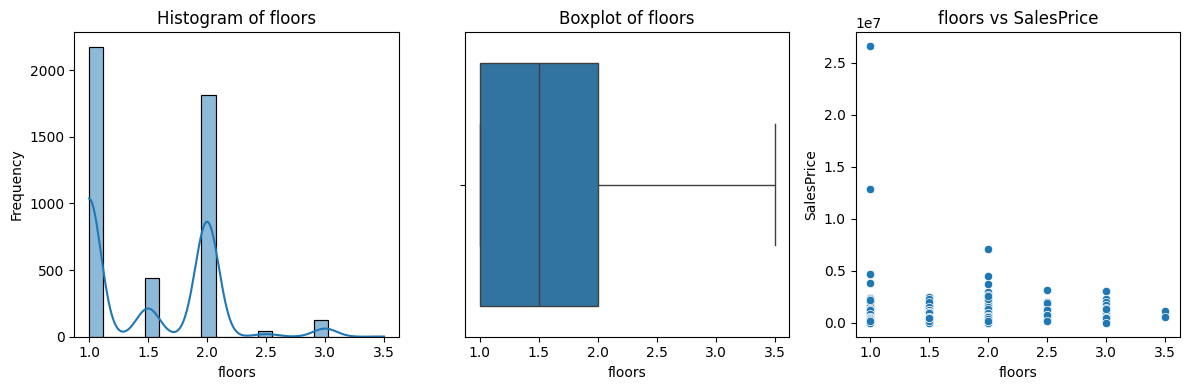

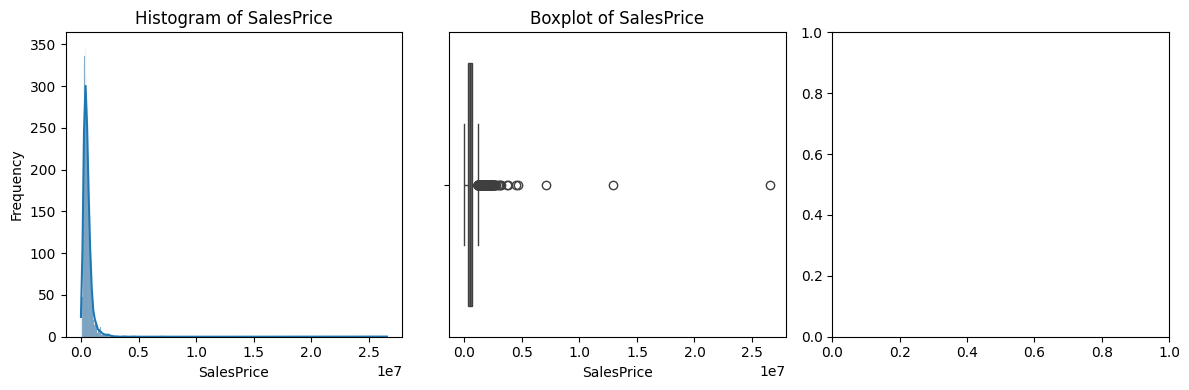

In [21]:
# Step 5: Visualizing the distribution of selected features with multiple plot types
selected_features = ['sqft_living', 'sqft_lot', 'floors', 'SalesPrice']

print("Step 5: Visualization of Feature Distributions")

for feature in selected_features:
    # Histogram
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    # Scatter plot (against SalesPrice)
    plt.subplot(1, 3, 3)
    if feature != 'SalesPrice':  # Scatter plot only makes sense for non-target features
        sns.scatterplot(x=feature, y='SalesPrice', data=df)
        plt.title(f'{feature} vs SalesPrice')
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')

    plt.tight_layout()
    plt.show()

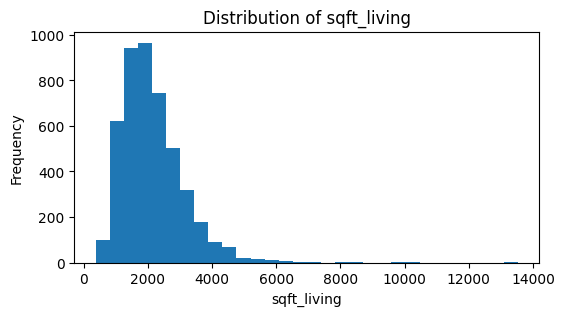

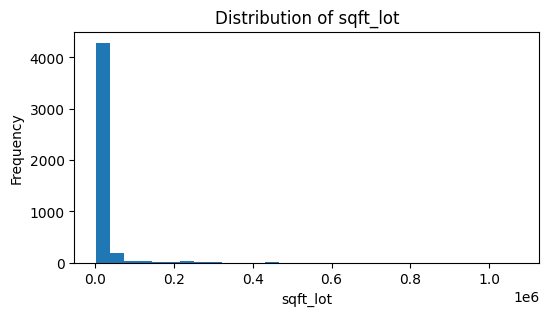

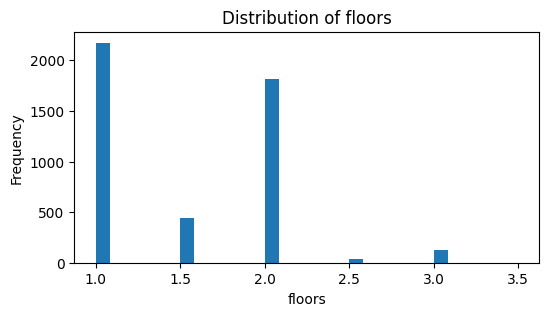

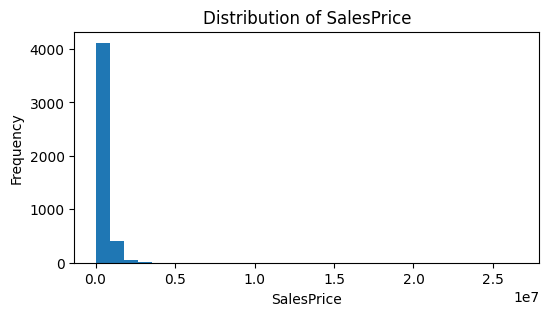

In [22]:
#Step 5: Visualizing the Distribution of Each Feature

import matplotlib.pyplot as plt

features = ['sqft_living', 'sqft_lot', 'floors', 'SalesPrice']
for feature in features:
    plt.figure(figsize=(6, 3))
    df[feature].plot(kind='hist', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()
    

Linear Regression (Single Variable)

In [23]:
# Step 6: Implementing the linear regression model
X = df[['sqft_lot']].values
y = df['SalesPrice'].values

# Calculating the mean of X and y
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculating the terms needed for the numerator and denominator of coefficient
x_minus_mean_x = X - mean_X
y_minus_mean_y = y - mean_y
xy_cov = x_minus_mean_x.flatten() * y_minus_mean_y  # Flatten X array for element-wise multiplication
x_var = x_minus_mean_x.flatten()**2

# Calculating the coefficient (slope)
coefficient = np.sum(xy_cov) / np.sum(x_var)

# Calculating the intercept
intercept = mean_y - coefficient * mean_X
print("Step 6: Linear Regression ")
print(f"Coefficient (slope): {coefficient}")
print(f"Intercept : {intercept}")


Step 6: Linear Regression 
Coefficient (slope): 0.7927166756315327
Intercept : 540189.1512958274


In [24]:
# Step 7: Calculating the sum of squared errors

predicted_y = coefficient * X.flatten() + intercept

# Calculating the errors (differences between actual and predicted values)
errors = y - predicted_y

# Calculating the sum of squared errors
SSE = np.sum(errors**2)

print("Step 7: Linear Regression ")
print(f"Sum of squared errors: {SSE}")


Step 7: Linear Regression 
Sum of squared errors: 1458344675295682.8


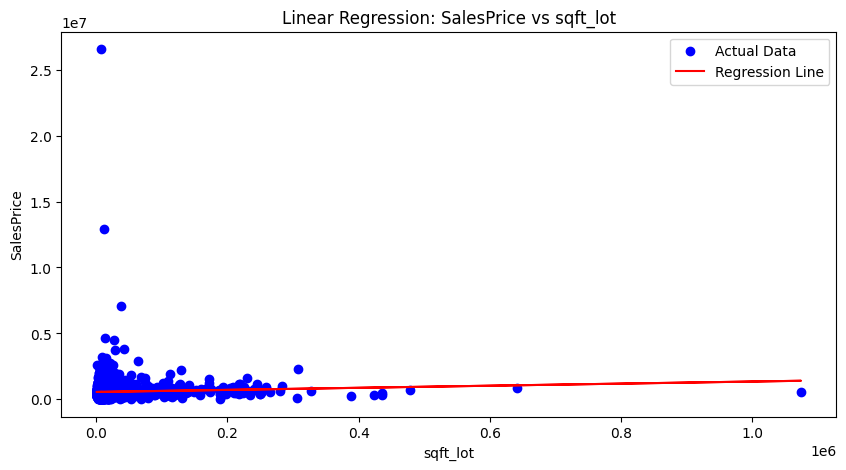

In [25]:
# Step 8: Ploting the regression line along with actual data points
import matplotlib.pyplot as plt

# Plotting the regression line along with the actual data points

plt.figure(figsize=(10, 5))

# Plotting the actual data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plotting the regression line
plt.plot(X, predicted_y, color='red', label='Regression Line')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('Linear Regression: SalesPrice vs sqft_lot')
plt.legend()

# Displaying the plot
plt.show()

In [26]:
# Step 9: Using the LinearRegression from sklearn and comparing coef and intercept with the model
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Print coefficients and intercept from sklearn model
print("Step 9: Linear Regression using sklearn")
print(f"Coefficient (slope): {model_sklearn.coef_[0]}")
print(f"Intercept: {model_sklearn.intercept_}")
print("\n")

Step 9: Linear Regression using sklearn
Coefficient (slope): 0.7927166756315324
Intercept: 540189.1512958274




Linear Regression (Multivariate) 

In [27]:
# Step 10: Using LinearRegression from sklearn with multiple features
# Extracting the features and target variable
X_multi = df[['sqft_living', 'sqft_lot']]
y_multi = df['SalesPrice']

# Creating a linear regression model
model_multi = LinearRegression()

# Fitting the model with the data
model_multi.fit(X_multi, y)

# Getting the coefficients and intercept for the model
coefs_multi = model_multi.coef_  
intercept_multi = model_multi.intercept_  
# Printing coefficients and intercept for the model with multiple features
print("Step 10: Linear Regression using sklearn with Multiple Features")
print(f"Coefficients: {coefs_multi}")
print(f"Intercept: {intercept_multi}")
print("\n")

Step 10: Linear Regression using sklearn with Multiple Features
Coefficients: [257.13000008  -0.66039049]
Intercept: 11681.16581558704




In [28]:
# Step 11: Printing R-squared (R²) score
# Calculating R-squared (R²) score
r_squared = model_multi.score(X_multi, y_multi)

print("Step 11: R-squared (R²) Score")
print(f"R-squared Score: {r_squared}")
print("\n")

Step 11: R-squared (R²) Score
R-squared Score: 0.1869409742537571




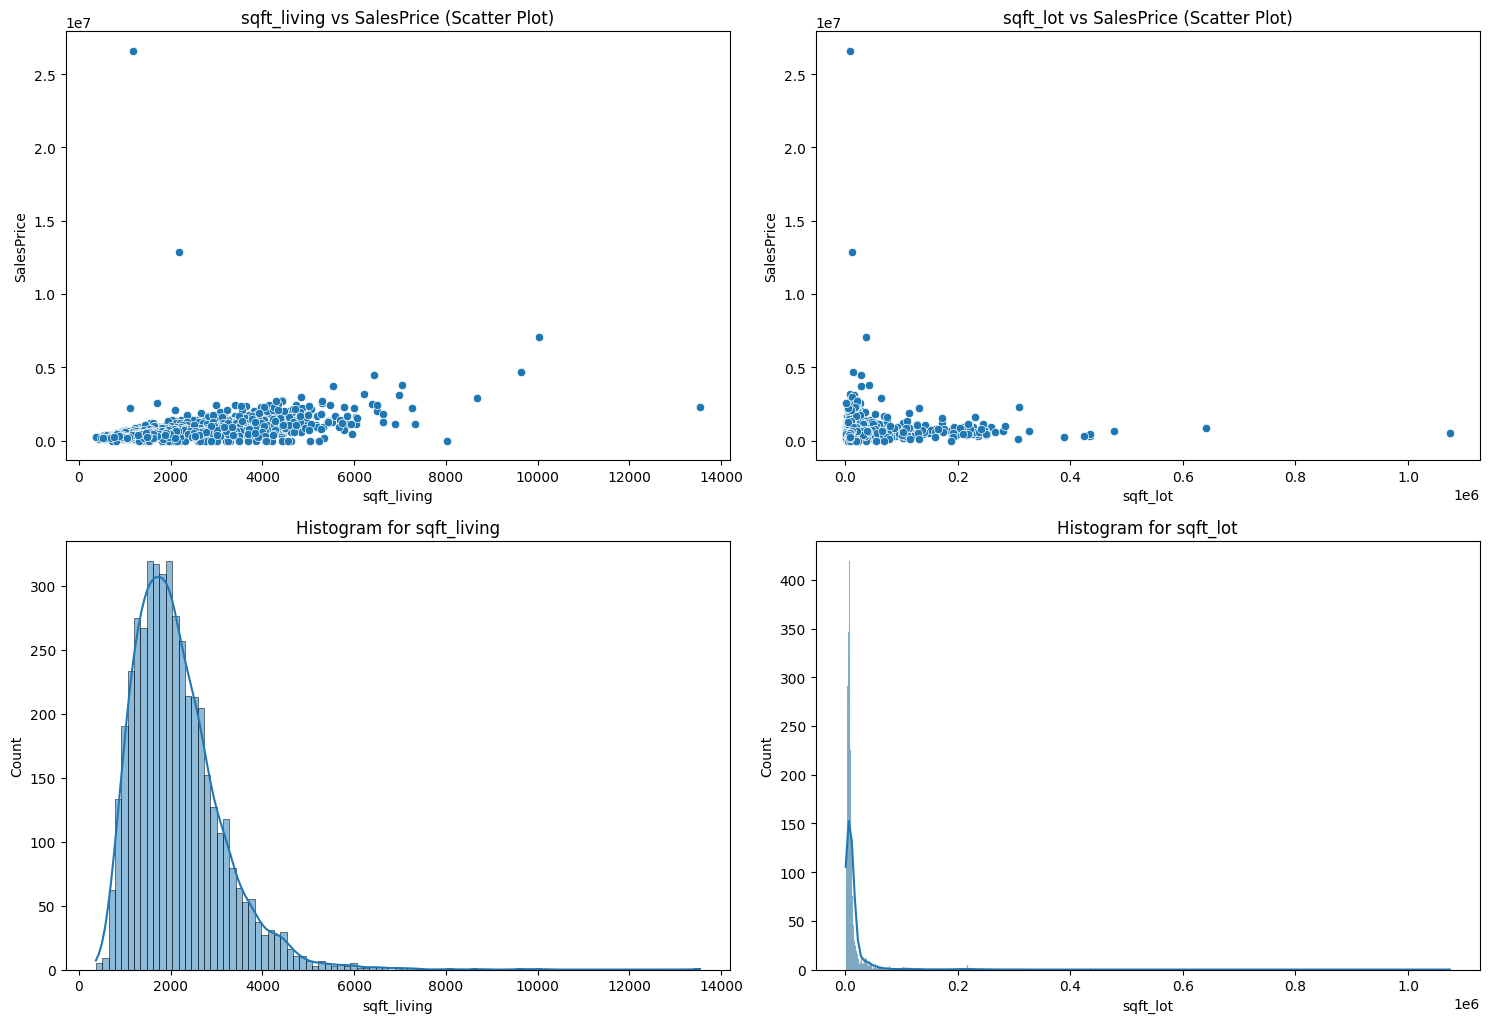

In [29]:
# Step 12: Visualize relationships between selected features and SalesPrice
plt.figure(figsize=(15, 15))

# Subplot 1: sqft_living vs SalesPrice (Scatter Plot)
plt.subplot(3, 2, 1)
sns.scatterplot(x='sqft_living', y='SalesPrice', data=df)
plt.title('sqft_living vs SalesPrice (Scatter Plot)')

# Subplot 2: sqft_lot vs SalesPrice (Scatter Plot)
plt.subplot(3, 2, 2)
sns.scatterplot(x='sqft_lot', y='SalesPrice', data=df)
plt.title('sqft_lot vs SalesPrice (Scatter Plot)')

# Subplot 3: Histogram for sqft_living
plt.subplot(3, 2, 3)
sns.histplot(df['sqft_living'], kde=True)
plt.title('Histogram for sqft_living')

# Subplot 4: Histogram for sqft_lot
plt.subplot(3, 2, 4)
sns.histplot(df['sqft_lot'], kde=True)
plt.title('Histogram for sqft_lot')

# Adjust layout
plt.tight_layout()
plt.show()

Polynomial Regression

In [30]:
# Step 13: Implementing Polynomial Regression of Degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a PolynomialFeatures object for degree 2
poly = PolynomialFeatures(degree=2)

# Transforming the 'sqft_lot' feature
X_poly = poly.fit_transform(df[['sqft_lot']])

# Creating and fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, df['SalesPrice'])

# Making predictions
y_poly_pred = poly_model.predict(X_poly)

# Coefficients and intercept
poly_coefs = poly_model.coef_
poly_intercept = poly_model.intercept_

# Calculating performance metrics
poly_mse = mean_squared_error(df['SalesPrice'], y_poly_pred)
poly_r2 = r2_score(df['SalesPrice'], y_poly_pred)

print("Step 13: \nCoefficients of Polynomial Regression Model (Degree 2):")
print(f"Coefficient for linear term (sqft_lot): {poly_coefs[1]}")
print(f"Coefficient for quadratic term (sqft_lot^2): {poly_coefs[2]}")
print("\n")

print("Intercept of Polynomial Regression Model (Degree 2):")
print(f"Intercept: {poly_intercept}")
print("\n")

print("Performance Metrics for Polynomial Regression (Degree 2):")
print(f"Mean Squared Error (MSE): {poly_mse}")
print(f"R-squared (R²) Score: {poly_r2}")
print("\n")




Step 13: 
Coefficients of Polynomial Regression Model (Degree 2):
Coefficient for linear term (sqft_lot): 1.6551169421182128
Coefficient for quadratic term (sqft_lot^2): -1.9812589857615137e-06


Intercept of Polynomial Regression Model (Degree 2):
Intercept: 530368.0959431354


Performance Metrics for Polynomial Regression (Degree 2):
Mean Squared Error (MSE): 316420761305.4654
R-squared (R²) Score: 0.00446670543314398




In [31]:
# Step 14: Printing R-squared (R²) Score

r2_poly = poly_r2  # R-squared value obtained from the polynomial regression model

print("Step 14: R-squared (R²) Score for Polynomial Regression (Degree 2)")
print(f"R-squared (R²) Score: {r2_poly}")
print("\n")

Step 14: R-squared (R²) Score for Polynomial Regression (Degree 2)
R-squared (R²) Score: 0.00446670543314398




Degree 1: R-squared Score = 0.0025453331704340387
Degree 2: R-squared Score = 0.00446670543314398
Degree 3: R-squared Score = 0.007104702743658375
Degree 4: R-squared Score = 0.0017250395679929698
Degree 5: R-squared Score = 0.0005669714665510472

Best Degree: 3 with R-squared Score: 0.007104702743658375



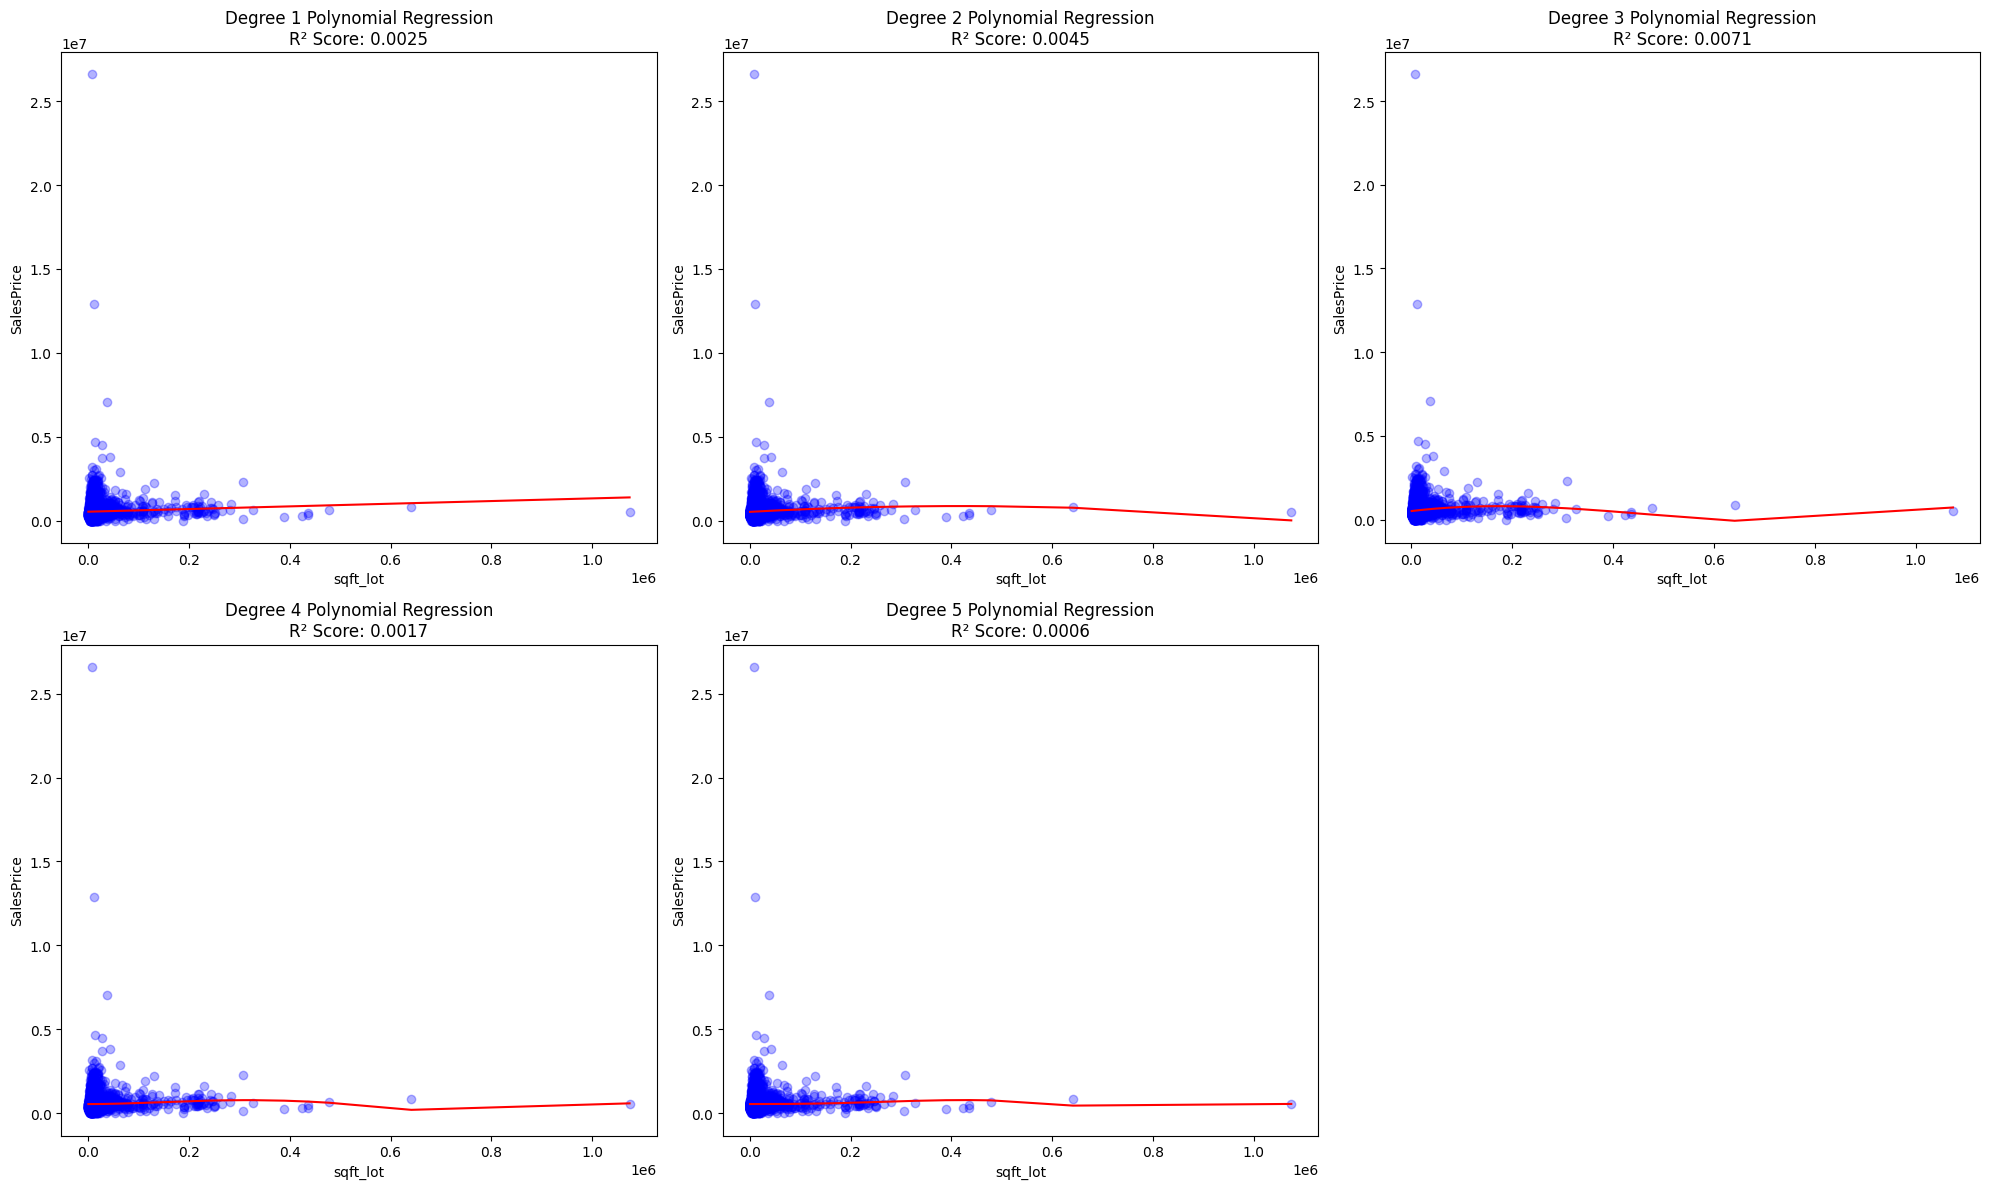

In [32]:
# Step 15: Experimenting with Different Polynomial Degrees
degrees = [1, 2, 3, 4, 5]
best_degree = 0
best_r2 = -1
r2_scores = {}

for degree in degrees:
    # Creating PolynomialFeatures for the current degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['sqft_lot']])  # Transforming the 'sqft_lot' feature

    # Creating and fitting the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, df['SalesPrice'])

    # Making predictions and calculating R-squared score
    y_poly_pred = poly_model.predict(X_poly)
    r2 = r2_score(df['SalesPrice'], y_poly_pred)
    r2_scores[degree] = r2

    # Updating the best degree and R² score
    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

# Printing R-squared scores for each degree
for degree, r2 in r2_scores.items():
    print(f"Degree {degree}: R-squared Score = {r2}")

# Printing the best degree and its R-squared score
print(f"\nBest Degree: {best_degree} with R-squared Score: {best_r2}\n")

# Plotting the graphs for each degree
plt.figure(figsize=(20, 12))

for i, degree in enumerate(degrees):
    # Creating PolynomialFeatures for the current degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['sqft_lot']])  # Transforming the 'sqft_lot' feature

    # Creating and fitting the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, df['SalesPrice'])

    # Making predictions
    y_poly_pred = poly_model.predict(X_poly)

    # Plotting the polynomial regression for the current degree
    plt.subplot(2, 3, i+1)
    plt.scatter(df['sqft_lot'], df['SalesPrice'], color='blue', alpha=0.3)
    sorted_order = np.argsort(df['sqft_lot'])
    plt.plot(df['sqft_lot'].iloc[sorted_order], y_poly_pred[sorted_order], color='red')
    plt.title(f'Degree {degree} Polynomial Regression\nR² Score: {r2_scores[degree]:.4f}')
    plt.xlabel('sqft_lot')
    plt.ylabel('SalesPrice')

plt.tight_layout()
plt.show()


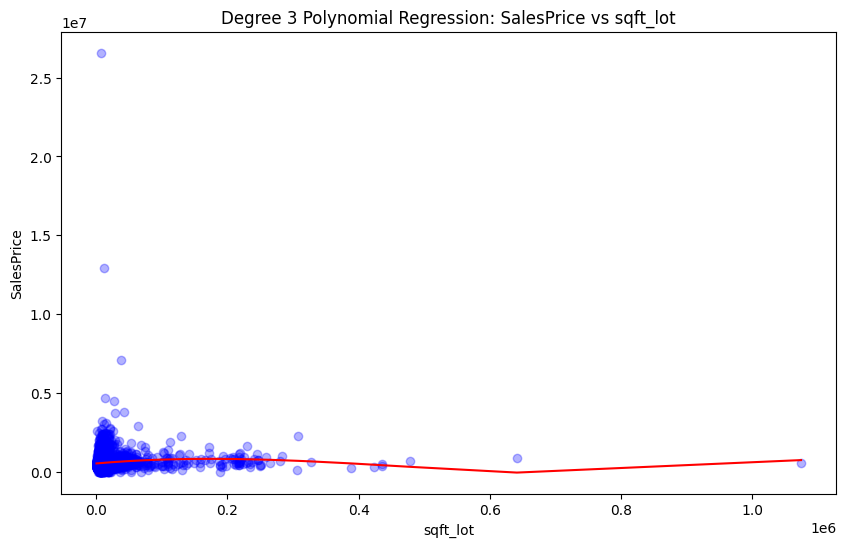

In [33]:
# Step 16: Ploting the Polynomial Regression Curve.

poly = PolynomialFeatures(degree=3)

# Transforming the 'sqft_lot' feature
X_poly = poly.fit_transform(df[['sqft_lot']])

# Creating and fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, df['SalesPrice'])

y_poly_pred = poly_model.predict(X_poly)

# Plotting the polynomial regression curve and actual data points
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_lot'], df['SalesPrice'], color='blue', alpha=0.3)  # Actual data points
sorted_order = np.argsort(df['sqft_lot'])
plt.plot(df['sqft_lot'].iloc[sorted_order], y_poly_pred[sorted_order], color='red')  # Regression curve
plt.title('Degree 3 Polynomial Regression: SalesPrice vs sqft_lot')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.show()


RANSAC (Robust Regression)

In [34]:
# Step 19: Apply RANSAC to Fit a Robust Linear Regression Model
from sklearn.linear_model import RANSACRegressor

X = df[['sqft_lot']]
y = df['SalesPrice']

# Creating the RANSAC regressor
ransac = RANSACRegressor()

# Fitting the RANSAC regressor to the data
ransac.fit(X, y)

# Getting the estimated coefficients and intercept
ransac_coef = ransac.estimator_.coef_[0]
ransac_intercept = ransac.estimator_.intercept_

print("Step 19: RANSAC to Fit a Robust Linear Regression Model")
print(f"Coefficients: {ransac_coef}")
print(f"Intercept: {ransac_intercept}")
print("\n")


Step 19: RANSAC to Fit a Robust Linear Regression Model
Coefficients: 0.8753771253916918
Intercept: 379323.4378187746




C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(


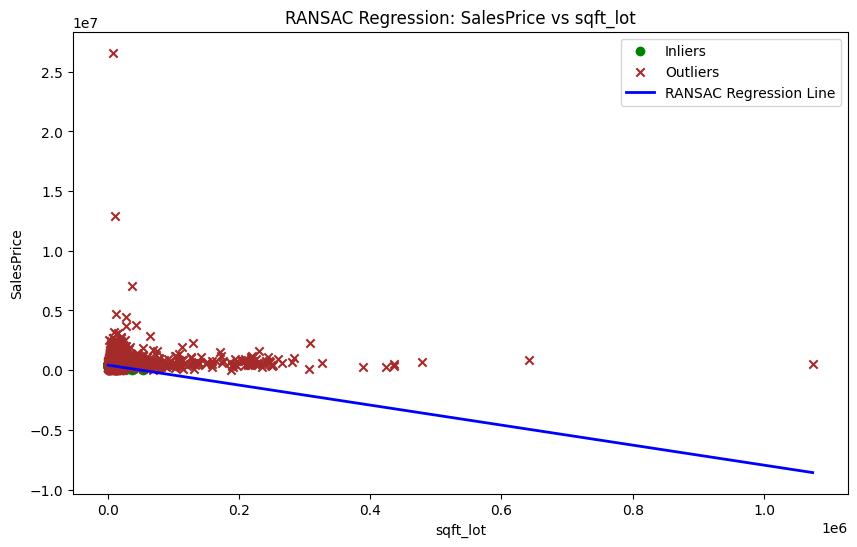

Step 20: Printing Coef and Intercept 
Coefficients: -8.38073535282175
Intercept: 426071.87716017145




In [35]:
# Step 20: Printing Coef and Intercept and Visualizing Plot with Inliers and Outliers

ransac = RANSACRegressor()
ransac.fit(X, y)

# Identifying inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Visualizing the plot with respect to inliers and outliers
plt.figure(figsize=(10, 6))

# Inliers
plt.scatter(X[inlier_mask].squeeze(), y[inlier_mask], color='green', marker='o', label='Inliers')

# Outliers
plt.scatter(X[outlier_mask].squeeze(), y[outlier_mask], color='brown', marker='x', label='Outliers')

# RANSAC regression line
line_X = np.arange(X['sqft_lot'].min(), X['sqft_lot'].max()).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)
plt.plot(line_X, line_y_ransac, color='blue', linewidth=2, label='RANSAC Regression Line')

plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('RANSAC Regression: SalesPrice vs sqft_lot')
plt.legend()
plt.show()

# Printing the coefficients and intercept of the RANSAC model
ransac_coef = ransac.estimator_.coef_[0]
ransac_intercept = ransac.estimator_.intercept_

print("Step 20: Printing Coef and Intercept ")
print(f"Coefficients: {ransac_coef}")
print(f"Intercept: {ransac_intercept}")
print("\n")


In [36]:
# Step 21: Printing the R-squared (R²) Score with and Without Inliers

# R-squared score with inliers
r2_with_inliers_only = ransac.score(X[inlier_mask], y[inlier_mask])

# R-squared score without inliers (only outliers)
r2_without_inliers_only = ransac.score(X[outlier_mask], y[outlier_mask])

print("Step 20: Printing Coef and Intercept ")
print(f"R-squared (R²) Score with Inliers: {r2_with_inliers_only}")
print(f"R-squared (R²) Score without Inliers: {r2_without_inliers_only}")
print("\n")




Step 20: Printing Coef and Intercept 
R-squared (R²) Score with Inliers: 0.16234614796929292
R-squared (R²) Score without Inliers: -0.7477918265334611




Step 22: Model Evaluation 

In [69]:
#Part3

Q3: Life Expectancy prediction

In [37]:
#Step 1:Loading the dataset
file_path1 = "C:/Users/ashmi/OneDrive/Desktop/LAB 2/LifeExpectancy.csv"  
data = pd.read_csv(file_path1)

# Displaying basic statistics of the data
data_stats = data.describe()
print("Statistics of the Data:")
print(data_stats)

Statistics of the Data:
              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.234717       164.725664      30.303948   
std       4.613841         9.509115       124.086215     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.546875              738.251295    83.022124    2419.592240   
std       3.921946             1987.914858    22.996984   11467.272489   
min       0.010000                0.0000

In [38]:
# Describing the  dataset
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [70]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [72]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [39]:
# Step 3: Categorize the columns into categorical and continuous

columns = data.columns

# Categorical and continuous columns
categorical_columns = []
continuous_columns = []

# Categorizing
for column in columns:
    # Assuming non-numeric columns and 'Year' are categorical
    if data[column].dtype == 'object' or column == 'Year':
        categorical_columns.append(column)
    else:
        continuous_columns.append(column)

# Displaying the categorized columns
categorical_columns, continuous_columns
print("Step 3: Categorize the columns into categorical and continuous ")
print(f"Categorical Columns: {categorical_columns}")
print(f"Continuous Columns: {continuous_columns}")
print("\n")


Step 3: Categorize the columns into categorical and continuous 
Categorical Columns: ['Country', 'Year', 'Status']
Continuous Columns: ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']




In [40]:
# Step 4: Identify the unique values from each column
unique_values_per_column = data.nunique()
print("Step 4: Unique Values from Each Column")
print(unique_values_per_column)
print("\n")

Step 4: Unique Values from Each Column
Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   819
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2491
Population                         2279
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64




In [41]:
# Step 5: Identify the Missing values and compute the missing values with mean, median, or mode
missing_values = data.isnull().sum()

# Impute missing values based on data type (mean for continuous, mode for categorical)
for column in data.columns:
    if column in continuous_columns:
        data[column].fillna(data[column].mean(), inplace=True)
    elif column in categorical_columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

print("Step 5: Missing Values Imputed")
print(data.isnull().sum())
print("\n")

Step 5: Missing Values Imputed
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64




In [42]:
# Step 6: Checking for outliers using IQR method
numeric_data = data.select_dtypes(include=[np.number])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print("\nStep 6: Checking for outliers using IQR method")
print("Outliers:")
print(outliers[outliers > 0])



Step 6: Checking for outliers using IQR method
Outliers:
Life expectancy                     17
Adult Mortality                     86
infant deaths                      315
Alcohol                              3
percentage expenditure             389
Hepatitis B                        322
Measles                            542
under-five deaths                  394
Polio                              279
Total expenditure                   51
Diphtheria                         298
 HIV/AIDS                          542
GDP                                445
Population                         452
thinness  1-19 years               100
thinness 5-9 years                  99
Income composition of resources    130
Schooling                           77
dtype: int64


In [73]:
# Step 7: Impute outliers with mean, median, or mode based on their categories
def impute_outliers_revised(df):
    imputed_data = df.copy()
    for col in df.columns:
        if df[col].dtype != 'object':
            # Calculate Q1, Q3, and IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Determine whether to use mean, median, or mode
            if df[col].skew() > 1:
                # Highly skewed data, use median
                impute_value = df[col].median()
            elif df[col].skew() < -1:
                # Negative skew, use mode
                impute_value = df[col].mode()[0]
            else:
                # Use mean for less skewed data
                impute_value = df[col].mean()

            # Impute outliers
            mask = (df[col] < lower_bound) | (df[col] > upper_bound)
            imputed_data.loc[mask, col] = impute_value
    
    return imputed_data

# Imputing outliers in the dataset
imputed_data_revised = impute_outliers_revised(data)

# Recounting outliers in the imputed dataset
imputed_outlier_counts_revised = count_outliers_post_imputation(imputed_data_revised)
imputed_outlier_counts_formatted_revised = "\n".join([f"{key}: {value}" for key, value in imputed_outlier_counts_revised.items()])

# Formatting the output
# Print results after outlier imputation
print("\nStep 7: Impute outliers with mean, median, or mode based on their categories")
output_formatted_revised = "Outliers after imputation:\n" + imputed_outlier_counts_formatted_revised
print(output_formatted_revised)




Step 7: Impute outliers with mean, median, or mode based on their categories
Outliers after imputation:
Country: 0
Year: 0
Status: 0
Life expectancy: 3
Adult Mortality: 22
infant deaths: 410
Alcohol: 0
percentage expenditure: 373
Hepatitis B: 323
Measles: 518
BMI: 0
under-five deaths : 415
Polio: 203
Total expenditure: 23
Diphtheria: 172
 HIV/AIDS: 615
GDP: 324
Population: 455
thinness  1-19 years: 33
thinness 5-9 years: 36
Income composition of resources: 0
Schooling: 29


C:\Users\ashmi\AppData\Local\Temp\ipykernel_8992\3086194283.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '95.09632402995234' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  imputed_data.loc[mask, col] = impute_value
C:\Users\ashmi\AppData\Local\Temp\ipykernel_8992\3086194283.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2007.5187202178352' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imputed_data.loc[mask, col] = impute_value


In [44]:
# Step 8: Calculating the summary statistics for numerical columns after imputation

# Selecting only numeric columns for summary statistics
numeric_columns = imputed_data_revised.select_dtypes(include=['number'])

# Calculating summary statistics
summary_statistics = numeric_columns.describe().T

# Adding the median to the summary statistics
summary_statistics['median'] = numeric_columns.median()

# Displaying the summary statistics
print(summary_statistics[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']])

                                         mean        median           std  \
Year                             2.007519e+03  2.008000e+03  4.613841e+00   
Life expectancy                  6.938713e+01  7.210000e+01  9.292743e+00   
Adult Mortality                  1.528060e+02  1.440000e+02  1.035515e+02   
infant deaths                    8.059905e+00  3.000000e+00  1.275437e+01   
Alcohol                          4.533761e+00  3.755000e+00  3.900368e+00   
percentage expenditure           1.474199e+02  6.488454e+01  2.277498e+02   
Hepatitis B                      9.040640e+01  9.200000e+01  8.278288e+00   
Measles                          7.073519e+01  1.700000e+01  1.582999e+02   
BMI                              3.838118e+01  4.350000e+01  1.993537e+01   
under-five deaths                9.115044e+00  4.000000e+00  1.481033e+01   
Polio                            9.005718e+01  9.500000e+01  1.110810e+01   
Total expenditure                5.788979e+00  5.755000e+00  2.152299e+00   

In [45]:
#Step 9: Identifying and performing label encoding on certain columns:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_columns = ['Country', 'Status']

for column in encoded_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Displaying the first few rows of the dataset to show the changes
data[encoded_columns]


,Country,Status
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,192,1
2934,192,1
2935,192,1
2936,192,1


In [46]:
#Step 10. Performing data normalization on ‘Adult Mortality', 'BMI', 'GDP’ numerical columns using StandardScaler() 

from sklearn.preprocessing import StandardScaler

# Selecting the columns to be normalized
columns_to_normalize = ['Adult Mortality', 'BMI', 'GDP']

# Extracting the specific columns
data_to_normalize = imputed_data_revised[columns_to_normalize]

# Initializing the StandardScaler
scaler = StandardScaler()

# Performing normalization
normalized_data = scaler.fit_transform(data_to_normalize)

# Creating a DataFrame for the normalized data
normalized_data_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Displaying the first few rows of the normalized data
normalized_data_df.head()


,Adult Mortality,BMI,GDP
0,1.064328,-0.967349,-0.735785
1,1.141597,-0.992434,-0.721340
2,1.112621,-1.017519,-0.711664
3,1.151256,-1.042605,-0.692253
4,1.180232,-1.062673,-1.000291


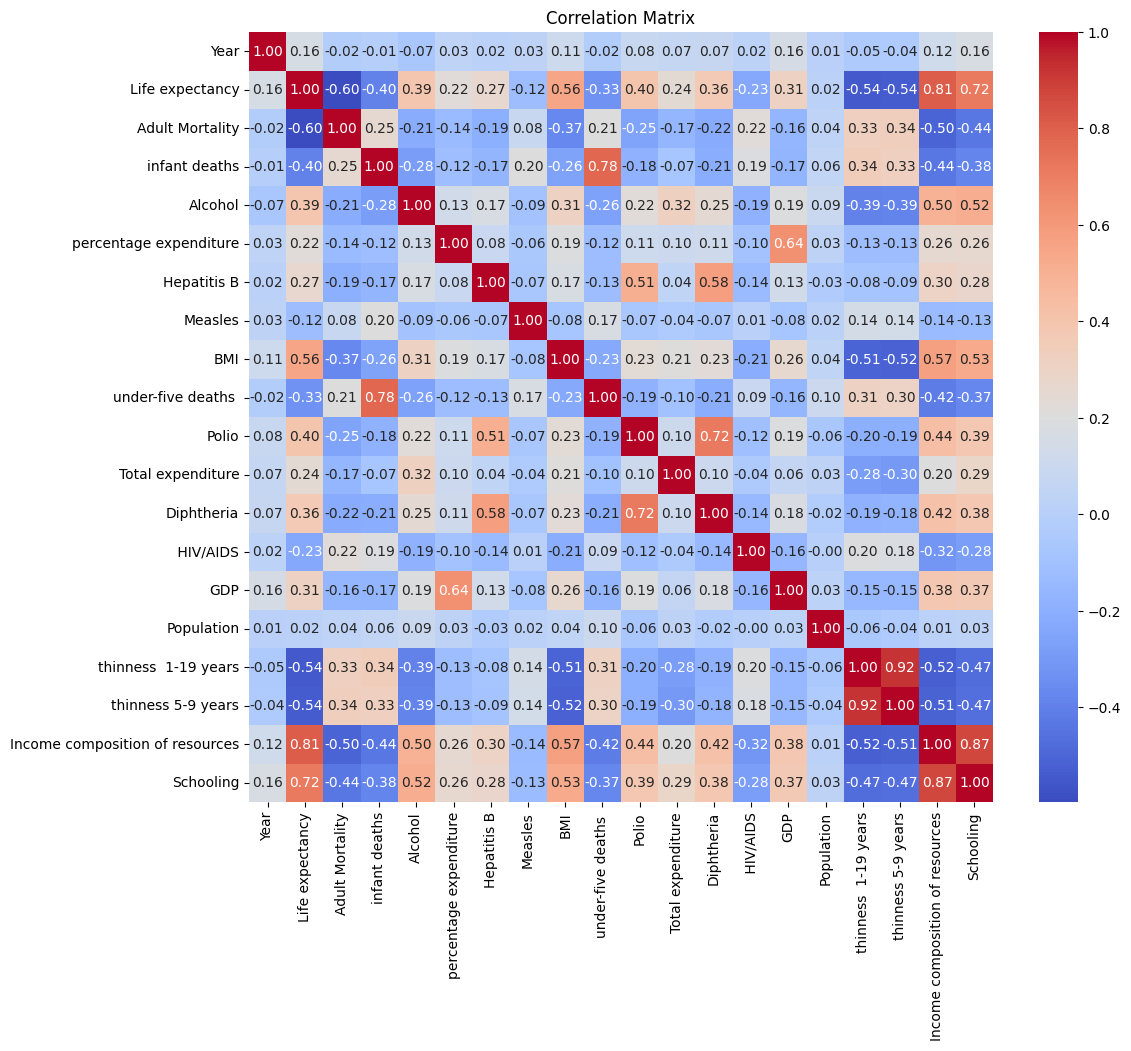

Most Positively Correlated Feature: Income composition of resources
Most Negatively Correlated Feature: Adult Mortality


In [47]:
#Step 11: Computing a correlation matrix and plot the correlation using a heat map. 

target_variable = 'Life expectancy'

numeric_columns = imputed_data_revised.select_dtypes(include=['number'])

# Computing the correlation matrix for numeric columns only
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Extracting correlations with the target variable and sorting them
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Identifying the most positively and negatively correlated features with the target variable
most_positively_correlated = correlation_matrix[target_variable].drop(target_variable).idxmax()
most_negatively_correlated = correlation_matrix[target_variable].drop(target_variable).idxmin()

print("Most Positively Correlated Feature:", most_positively_correlated)
print("Most Negatively Correlated Feature:", most_negatively_correlated)


In [48]:
# Step12: Split Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Dropping the 'Country' column from the dataset
data_without_country = imputed_data_revised.drop('Country', axis=1)

# Splitting the dataset into features (X) and target (y)
# Assuming 'Life expectancy' as the target variable
X = data_without_country.drop('Life expectancy', axis=1)
y = data_without_country['Life expectancy']

# Splitting the dataset into training and testing sets in a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing the shapes of the training and testing sets in the specified format
print(f"Training Features (X_train): {X_train.shape[0]} samples, {X_train.shape[1]} features each.")
print(f"Testing Features (X_test): {X_test.shape[0]} samples, {X_test.shape[1]} features each.")
print(f"Training Target (y_train): {y_train.shape[0]} samples.")
print(f"Testing Target (y_test): {y_test.shape[0]} samples.")




Training Features (X_train): 2056 samples, 20 features each.
Testing Features (X_test): 882 samples, 20 features each.
Training Target (y_train): 2056 samples.
Testing Target (y_test): 882 samples.


In [50]:
#Step13. Linear regression model using the training and testing datasets and compute mean absolute error

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Removing non-numeric columns from the training and testing sets
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Building the linear regression model
linear_model = LinearRegression()

# Training the model using the numeric training dataset
linear_model.fit(X_train_numeric, y_train)

# Predicting the target variable for the numeric testing dataset
y_pred = linear_model.predict(X_test_numeric)

# Computing the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 3.1838454886469876


In [51]:
#Step 14: linear regression model using mini batch gradient descent and stochastic gradient descent with alpha=0.0001, learning rate='invscaling', maximum iterations =1000, batch size=32 and compute mean absolute error.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Assuming df is your DataFrame
from pandas import read_csv

# Assuming df is your DataFrame
df = read_csv("LifeExpectancy.csv")

# Define the categorical and numerical columns
categorical_columns = ['Country', 'Status']
numeric_columns = df.drop(columns=['Country', 'Status', 'Life expectancy']).columns

# Define a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Preprocess the features
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Convert y_train and y_test to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Implement SGD
sgd_regressor = SGDRegressor(alpha=0.0001, learning_rate='invscaling', max_iter=1000, random_state=42)
sgd_regressor.fit(X_train, y_train)
sgd_predictions = sgd_regressor.predict(X_test)
sgd_mae = mean_absolute_error(y_test, sgd_predictions)
print("SGD Mean Absolute Error:", sgd_mae)

# Implement MBGD
mbgd_regressor = SGDRegressor(alpha=0.0001, learning_rate='invscaling', max_iter=1, random_state=42)
batch_size = 32

for epoch in range(1000):
    shuffled_indices = np.random.permutation(X_train.shape[0])
    for i in range(0, X_train.shape[0], batch_size):
        end_index = min(i + batch_size, X_train.shape[0])
        X_batch = X_train[shuffled_indices[i:end_index]]
        y_batch = y_train[shuffled_indices[i:end_index]]
        mbgd_regressor.partial_fit(X_batch, y_batch)

mbgd_predictions = mbgd_regressor.predict(X_test)
mbgd_mae = mean_absolute_error(y_test, mbgd_predictions)
print("MBGD Mean Absolute Error:", mbgd_mae)



SGD Mean Absolute Error: 1.7386393060367737
MBGD Mean Absolute Error: 1.649591340889095


In [58]:
#Step 15: linear regression model using mini batch gradient descent with learning rate = 0.0001, maximum iterations =1000 and batch size=32. Manually without using any scikit learn libraries.
import numpy as np

def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias


In [59]:
def scale_features(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [60]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y.reshape(-1, 1)))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size

    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1]
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[n_minibatches * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1]
        mini_batches.append((X_mini, Y_mini))
    return mini_batches


In [61]:
def gradient_descent(X, y, weights, bias, learning_rate):
    num_examples = X.shape[0]
    predictions = np.dot(X, weights) + bias
    error = predictions - y
    dW = (1 / num_examples) * np.dot(X.T, error)
    db = (1 / num_examples) * np.sum(error)
    weights -= learning_rate * dW
    bias -= learning_rate * db
    return weights, bias


In [62]:
# Preparing the data
X = df.drop(['Life expectancy', 'Country', 'Status'], axis=1).values  # Exclude non-numeric and target columns
y = df['Life expectancy'].values
X_scaled = scale_features(X)

# Initialize parameters
n_features = X_scaled.shape[1]
weights, bias = initialize_parameters(n_features)

# Hyperparameters
learning_rate = 0.0001
iterations = 1000
batch_size = 32

# Mini-Batch Gradient Descent
for i in range(iterations):
    mini_batches = create_mini_batches(X_scaled, y, batch_size)
    for mini_batch in mini_batches:
        X_mini, y_mini = mini_batch
        weights, bias = gradient_descent(X_mini, y_mini, weights, bias, learning_rate)



In [63]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Make predictions
predictions = np.dot(X_scaled, weights) + bias

# Calculate MAE
mae = mean_absolute_error(y, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 3.082132086008513


Step 16: Compare the results from each approach and also explain the difference between mini batch
gradient descent and stochastic gradient descent.

The MAE values obtained from the models are as follows:

Scikit-learn SGD: MAE = 1.7386

Scikit-learn MBGD: MAE = 1.6480

Manual MBGD: MAE = 3.0821

The scikit-learn models outperformed the manual implementation. This superiority can be attributed to scikit-learn’s optimized algorithms, which possibly include better handling of numerical precision and additional features like regularization.
The slightly better performance of MBGD over SGD in scikit-learn’s implementation suggests that batching leads to more stable convergence in this particular dataset.

SGD vs MBGD

Stochastic Gradient Descent: Updates model parameters after each data point, leading to fast iteration times but potentially unstable convergence due to high variance in updates.

Mini-Batch Gradient Descent: Updates parameters after processing a subset of data, balancing computational efficiency and update frequency, often leading to more stable and faster convergence.

The comparison highlights the effectiveness of scikit-learn’s implementations of SGD and MBGD over manual coding, especially in terms of ease of use and performance accuracy. While manual implementations offer valuable insights into the inner workings of algorithms, libraries like scikit-learn provide more robust, optimized, and efficient tools for machine learning tasks.